**Goal of the project**

In this project, we will be working to understand the results of an A/B test run by an e-commerce website. The company has developed a new web page in order to try and increase the number of users who "convert," meaning the number of users who decide to pay for the company's product. Our goal is to work through this project to help the company understand if they should implement this new page, keep the old page, or perhaps run the experiment longer to make their decision.

**Formulating a hypothesis**

First things first, we want to make sure we formulate a hypothesis at the start of our project. This will make sure our interpretation of the results is correct as well as rigorous.

$ H_{0}: p_{old} ≥ p_{new} $

$ H_{1}: p_{old} < p_{new} $

where $ p_{old} $ and $ p_{new} $ stand for the conversion rate of the new and old design, respectively.

**Choosing the variables**

For our test we’ll need two groups:

* A control group - They'll be shown the old design

* A treatment (or experimental) group - They'll be shown the new design

This will be our **independent variable**. The reason we have two groups is that we want to control for other variables that could have an effect on our results, such as seasonality: by having a control group we can directly compare their results to the treatment group, because the only systematic difference between the groups is the design of the product page, and we can therefore attribute any differences in results to the designs.

For our **dependent variable** (i.e. what we are trying to measure), we are interested in capturing the conversion rate. A way we can code this is by each user session with a binary variable:

* 0 - The user did not buy the product during this user session

* 1 - The user bought the product during this user session

**Collecting the data**

In [233]:
# Importing libraries
import pandas as pd
import numpy as np

In [234]:
# Load dataset
df = pd.read_csv('../input/ab-testing/ab_data.csv')

In [235]:
# Examine the data
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [236]:
# Overview of all variables, their datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       294478 non-null  int64 
 1   timestamp     294478 non-null  object
 2   group         294478 non-null  object
 3   landing_page  294478 non-null  object
 4   converted     294478 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


**Preparing the data**

In [237]:
df['group'].value_counts()

treatment    147276
control      147202
Name: group, dtype: int64

In [238]:
pd.crosstab(df['group'], df['landing_page'])

landing_page,new_page,old_page
group,,
control,1928,145274
treatment,145311,1965


For the rows where treatment is not aligned with new_page or control is not aligned with old_page, we cannot be sure if this row truly received the new or old page. 

In [239]:
# To make sure all the control group are seeing the old page 
df_old = df[df['group'] == 'control'][df['landing_page'] == 'old_page']

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [240]:
# To make sure all the treatment group are seeing the new page 
df_new = df[df['group'] == 'treatment'][df['landing_page'] == 'new_page']

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [241]:
# Create a new dataset 
df = pd.concat([df_old, df_new])

In [242]:
df.tail()

,user_id,timestamp,group,landing_page,converted
294462,677163,2017-01-03 19:41:51.902148,treatment,new_page,0
294465,925675,2017-01-07 20:38:26.346410,treatment,new_page,0
294468,643562,2017-01-02 19:20:05.460595,treatment,new_page,0
294472,822004,2017-01-04 03:36:46.071379,treatment,new_page,0
294477,715931,2017-01-16 12:40:24.467417,treatment,new_page,0


The number of unique users in the dataset.

In [243]:
df['user_id'].nunique()

290584

In [244]:
len(df.index)

290585

There is one user_id repeated in df.

In [245]:
duplicates = df[df.duplicated(['user_id'], keep = False)]

In [246]:
duplicates.sort_values(['user_id'], ascending = False) 

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


In [247]:
# Remove one of the rows with a duplicate user_id
df.drop_duplicates(subset = 'user_id', keep = 'first', inplace = True)

In [248]:
df['user_id'].nunique()

290584

In [249]:
len(df.index)

290584

In [250]:
import scipy.stats as stats

In [251]:
# Given that an individual was in the control group, what is the probability they converted?
df[df['group'] == 'control']['converted'].mean()

0.1203863045004612

In [252]:
# Given that an individual was in the treatment group, what is the probability they converted?
df[df['group'] == 'treatment']['converted'].mean()

0.11880806551510564

There is no suffient evidence to support the statement that one page leads to more conversions.

For the reason that the converted rate of the treatment group is approximately 11.9% while the converted rate of the control group is approximately 12.0%. We can see the two results are pretty close to each other, we can not make a conclusion that the treatment group take effect or vice versa. In order to make that conclution, we need to make further experiments such as A/B testing.

**Choosing a sample size**

Having a required sample size is one of the important cornerstones of a successful A/B test and is dependant on 3 factors:

* **Statistical power** (usually 1 − β = 0.8): The ability of the experiment to correctly identify a positive change, given that there is indeed one.

* **Significant level** (α = 0.05): The probability of wrongly identifying a positive change, when there is actually none.

* **Minimum detectable effect** (MDE = 0.025): The minimum change that the business would like to detect in this test.

Luckily, it is possible to calculate this number. Evan Miller made an [excellent calculator](https://www.evanmiller.org/ab-testing/sample-size.html) that we can use to come up with the numbers we need.

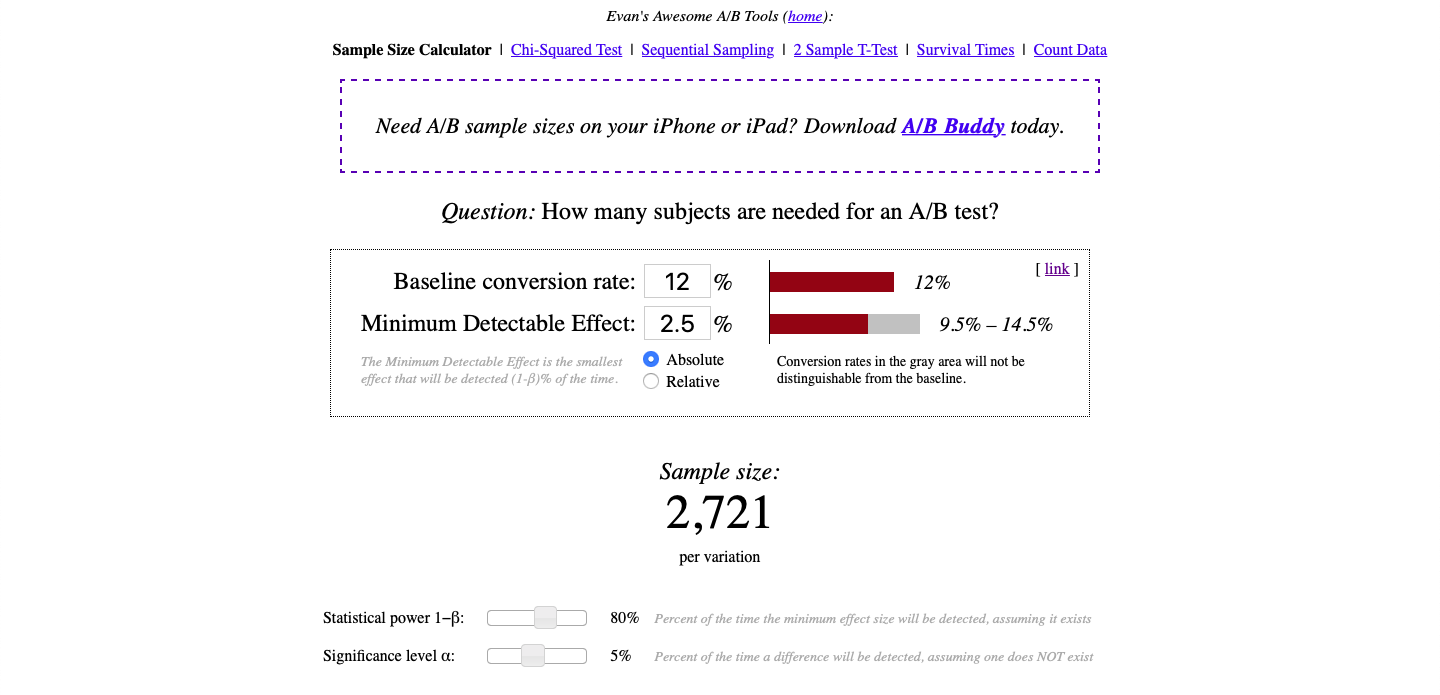

When using Evan Miller's calculator, the minimum sample size per per variation = 2,721. Given we have 2 variations (control and treatment): the total minimum sample size = 5,442. Since we have a total sample size of 290,584, our A/B test will have enough statistical power and significance.

**Testing the hypothesis**

We can use existing packages to calculate our test statistic and p-values and test for proportions based on the z-test. 

In [253]:
from statsmodels.stats.proportion import proportions_ztest

In [254]:
# The number of successes in nobs trials
converted_old = len(df[df.landing_page == 'old_page'][df.converted == 1])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [255]:
converted_new = len(df[df.landing_page == 'new_page'][df.converted == 1])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [256]:
# The number of trials or observations
n_old = len(df[df.landing_page == 'old_page'])

In [257]:
n_new = len(df[df.landing_page == 'new_page'])

In [258]:
import statsmodels.api as sm
from statsmodels.stats.proportion import proportions_ztest

In [259]:
# Conducting the z test
stat, p_val = sm.stats.proportions_ztest([converted_old, converted_new], [n_old, n_new], alternative = 'smaller')

In [260]:
# Test statistic for the z-test
stat

1.3109241984234394

In [261]:
# P-value for the z-test
p_val

0.9050583127590245

**Conclusion**

The p-value is about 0.905. And we know that the critical value is 0.05, which is lesser than the value of p-value we computed above. So we can not reject the null hypothesis. We think there is no difference between the old and new pages.